# Data Visusalisation 

This notebook focus on constructing basic statistical data visualisation using Pandas. We will also explore Pandas's graphic backend [matplotlib](https://matplotlib.org) as well as introducing [Seaborn](https://seaborn.pydata.org) to expand our visualisation capability. 

Before we do that, it is also important to acknowledge that there are many different modules available in Python for Data Visualisaiton. This includes [plotly](https://plotly.com) and [Bokeh](https://docs.bokeh.org/en/latest/). The latter also makes it very easy to put together an interactive webapplication for users to explore different scenarios. For some quick examples see [here]( https://chansta-statistics.herokuapp.com) for some demonstrations on using Bokeh to explore normal and t distributions as well as the concept of correlation. 

It is also important to note that this notebook barely scratches the surface of the world on data visusalistion, statistical data or otherwise. The modules mentioned above will each contain further inforamtion on how to learn more about data visualisation. Please feel free to explore. 

The list of topics inlcude in this notebook are

1. [Boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)
2. [Histogram](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)
3. [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) 
4. [Lineplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
5. [Scatter plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
6. [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Boxplot

Boxplot can be constructed directly from a Pandas dataframe. To demonstrate we first import the necesary module and data. We will, again, utlise the MovieFinance.csv data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[12,9]
mfin = pd.read_csv('../data/MovieFinances.csv', header=0)
mfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                5219 non-null   object 
 1   Month                5219 non-null   object 
 2   Day                  5219 non-null   int64  
 3   Release Year         5219 non-null   int64  
 4   Budget($M)           5219 non-null   float64
 5   Domestic Gross($M)   5219 non-null   float64
 6   Worldwide Gross($M)  5219 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 285.5+ KB


Let's construct a boxplot for *Budget*, *Domestic Gross* and *Worldwide Gross*. 

<AxesSubplot:>

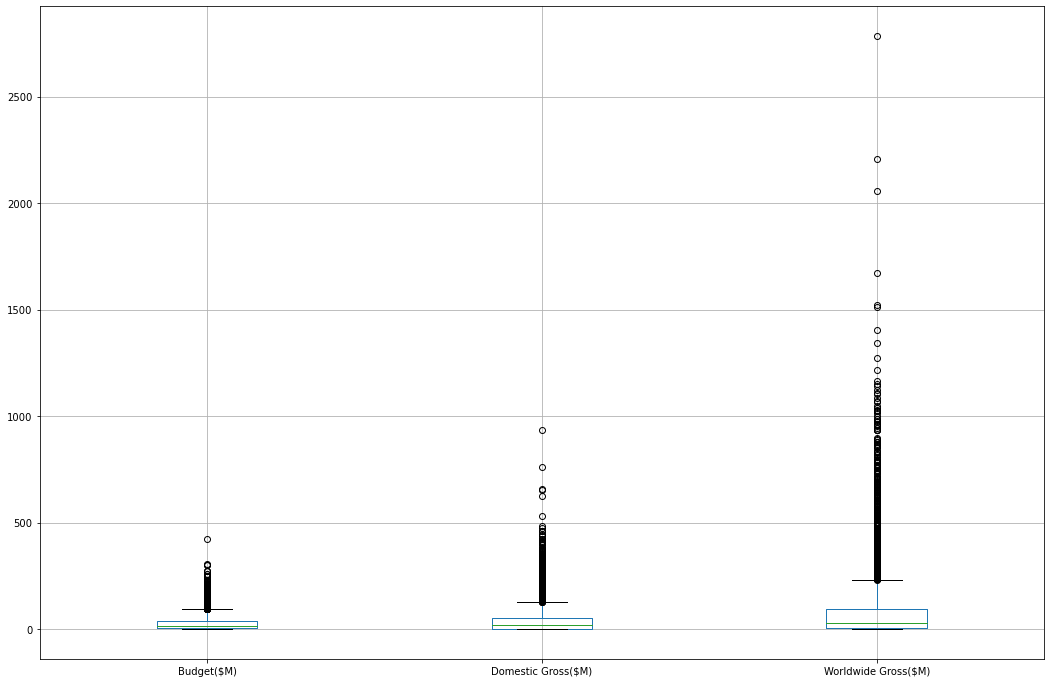

In [2]:
var = ['Budget($M)', 'Domestic Gross($M)', 'Worldwide Gross($M)']
mfin.boxplot(column=var, figsize=[18,12])

The *column* input is used to identify which variables (columns) you wish to construct a boxplot. The *figsize* argument controls the size of the plot. I tend to use the $4:3$ aspect ratio but that depends on your requirements.

There are many other options. For details see [here]((https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)).

In this case, all the boxplots are put together into one set of axis, so it makes the plots more difficult to read. We can divide them into three separate plots

<AxesSubplot:>

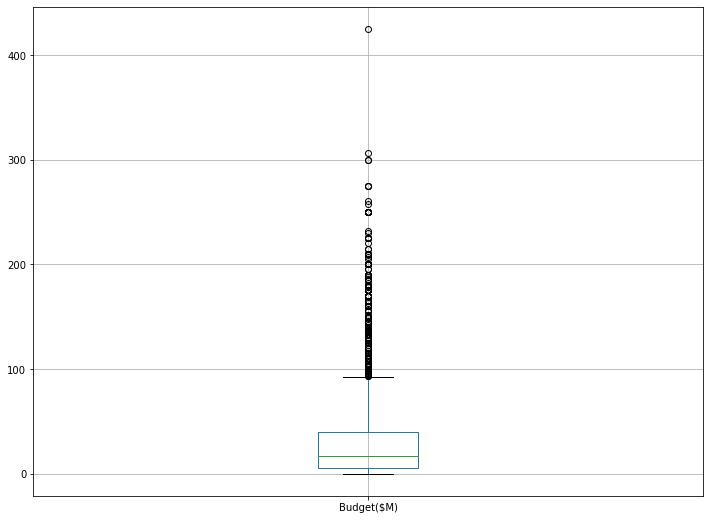

In [3]:
mfin.boxplot(column='Budget($M)', figsize=[12,9])

<AxesSubplot:>

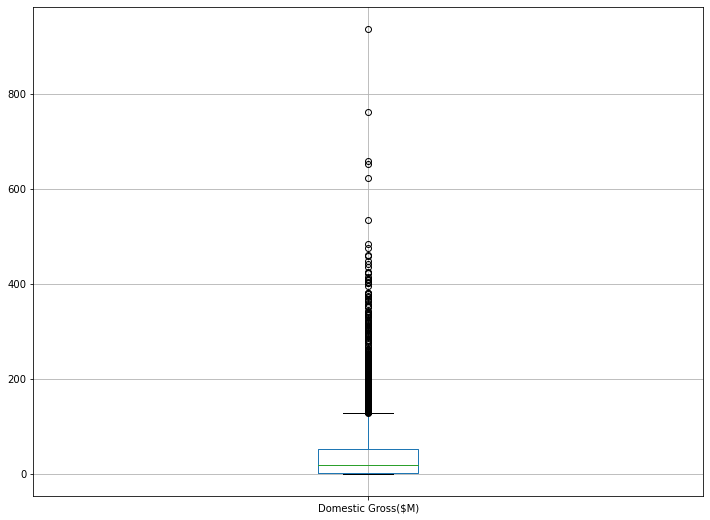

In [4]:
mfin.boxplot(column='Domestic Gross($M)', figsize=[12,9])

<AxesSubplot:>

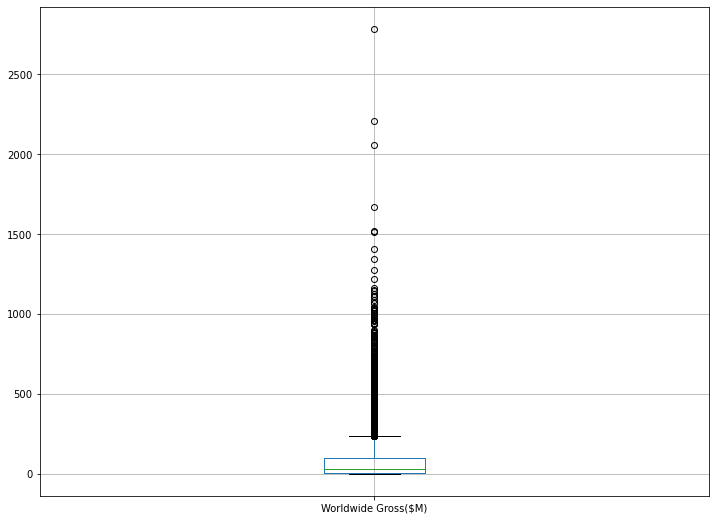

In [5]:
mfin.boxplot(column='Worldwide Gross($M)', figsize=[12,9])

**Exercise** Construct a boxplot for Release Year. What does it tell you? 

<AxesSubplot:>

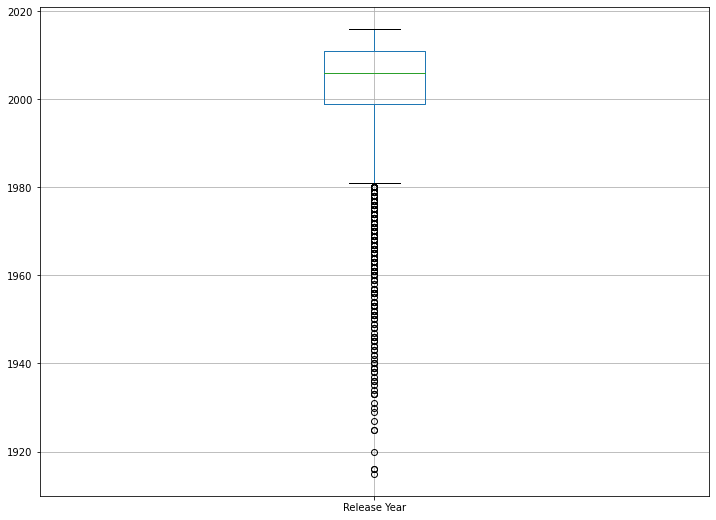

In [18]:
mfin.boxplot(column='Release Year')

It is also possible to plot a set of histogram based on the values of a different (categorical) variables using the by keywords. Let say we want to construct a historgram of budget for Release Year 2015, 2016, and 2017.

This involves two tasks. The first tasks is to extract the data with release year in 2015, 2016 and 2017. We use the standard approach of constructing a *boolean* (true or false) variable to identify the rows that satisfy the criterion. Then we use that variable to extract the data using the *loc* method. 

The boolean variable in this case utilises the _**OR**_ operator "|". Becasue we want movies that were released in 2012 OR 2013 OR 2014. We call this variable select. 

<AxesSubplot:title={'center':'Budget($M)'}, xlabel='Release Year'>

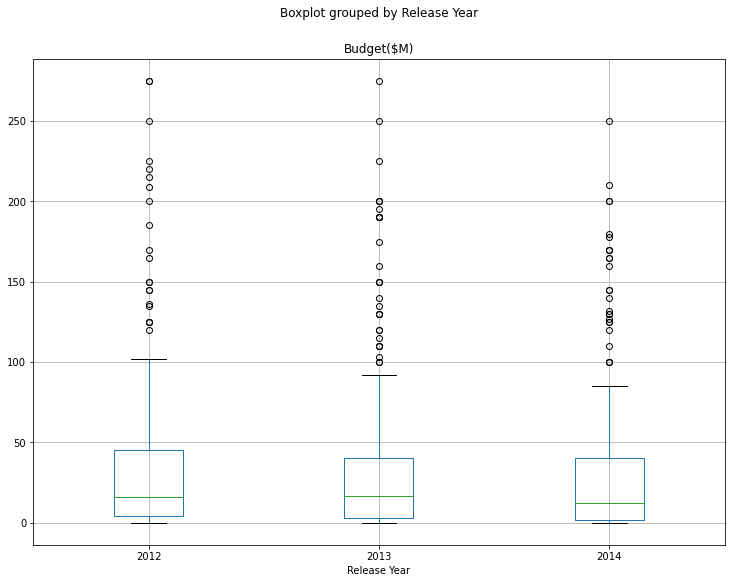

In [6]:
select = (mfin['Release Year']==2012)|(mfin['Release Year']==2013)|(mfin['Release Year']==2014) #construct the boolean variable. 
mfinsub = mfin.loc[select, :]
mfinsub.boxplot(column="Budget($M)", figsize=[12,9], by='Release Year') 

**Exercise:** Construct a set of histograms of "Worldwide Gross" by Release year 2001, 2002, 2003. 

In [19]:
select01 = (mfin['Release Year']>=2001)&(mfin['Release Year']<=2003)
mfinsub = mfin.loc[select01, :]
mfinsub.boxplot(column="Worldwide Gross($M)", figsize=[12,9], by='Release Year') 

<AxesSubplot:title={'center':'Worldwide Gross($M)'}, xlabel='Release Year'>

## Histogram

Constructing histogram is just as easy. Assuming we wish to examine the histograms of the three varibales. Further details on the various options with histograms can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).


array([[<AxesSubplot:title={'center':'Budget($M)'}>,
        <AxesSubplot:title={'center':'Domestic Gross($M)'}>,
        <AxesSubplot:title={'center':'Worldwide Gross($M)'}>]],
      dtype=object)

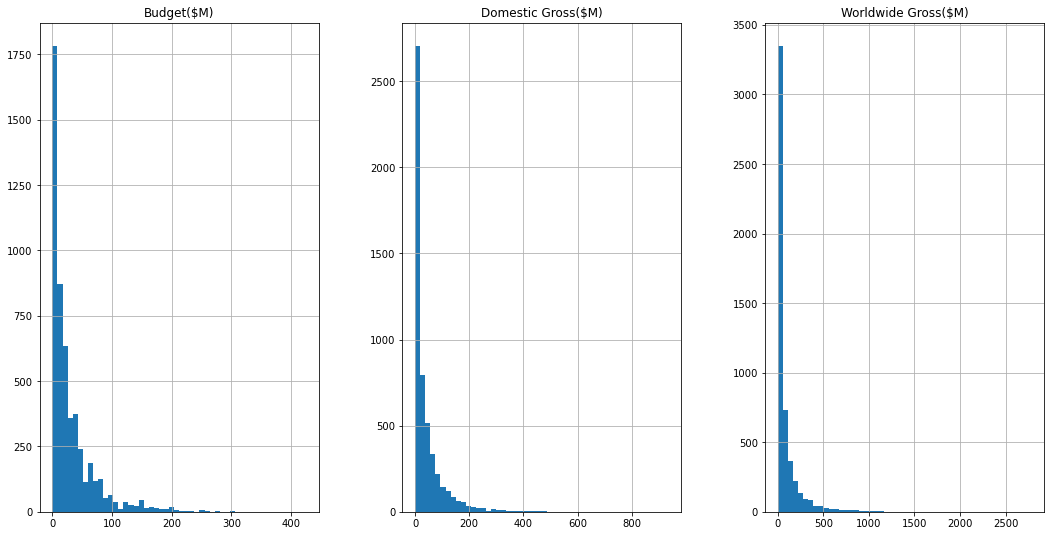

In [7]:
mfin.hist(figsize=[18,9], column=var, bins=50,  layout=(1,3))

Becasue there are going to be three historgrams, the *layout* argument specifies how you want to layout the histograms. In this case, the three histograms is presented as $1\times 3$ array i.e. 1 rows and 3 columns. 

The *bins* argument specifies the "resolution" of the histogram i,e, the number of intervals (bins) given the range of values. The higher is the number of bins, the narrower is each intervals and thus higher "resolution". Too many bins, however, may result in intervals that have no observations. 

**Exercise:** 
1. Change the bins size to 400 and see what it does. 
2. Change the layout to (3,1). What do you think you need to do to make it looks better? **Hint:** Consider a new figsize. 

array([[<AxesSubplot:title={'center':'Budget($M)'}>],
       [<AxesSubplot:title={'center':'Domestic Gross($M)'}>],
       [<AxesSubplot:title={'center':'Worldwide Gross($M)'}>]],
      dtype=object)

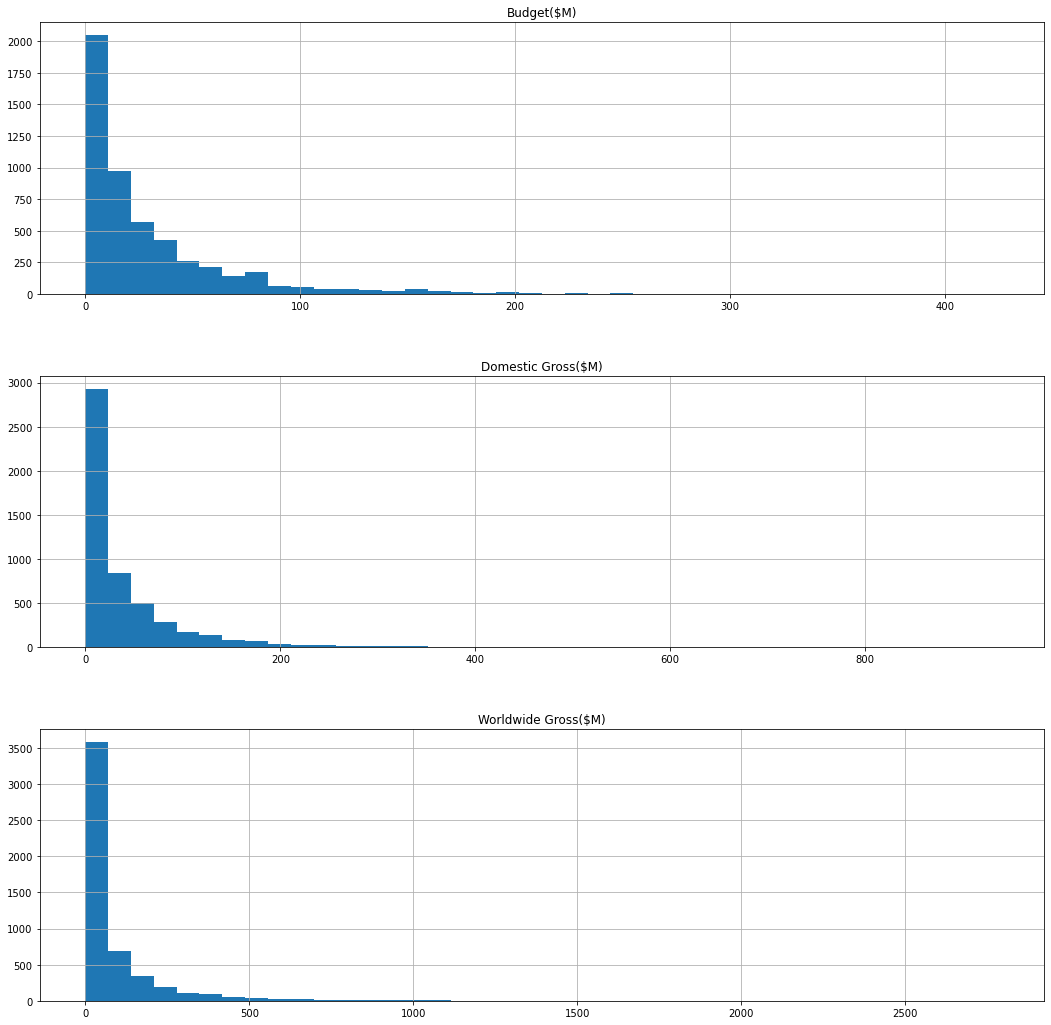

In [22]:
mfin.hist(figsize=[18,18], column=var, bins=40,  layout=(3,1))

## Violin Plot 

While boxplot is great to identify "outlier" and cluster of observations and histogram provides information on the shape of the distribution, *violin plot* combines both together. 

An easy way to obtain a violin plot is to use the module [Seaborn](https://seaborn.pydata.org).

We first import the module. 

In [8]:
import seaborn as sb

Then we use the function [*violinplot*](https://seaborn.pydata.org/generated/seaborn.violinplot.html) in Seaborn. In this case, we construct a violinplot version of the histograms and boxplots we did for *Budget* by year 2012, 2013 and 2014. 

In [9]:
sb.violinplot(x='Release Year', y='Budget($M)', data=mfinsub)

<AxesSubplot:xlabel='Release Year', ylabel='Budget($M)'>

The $x$ argument specified the variable that contains 'Release Year' (similar to the *by* argument in Pandas) while the $y$ argument is the variable in which we wish to construct the plot for. Again, there are many options for customisation. Please consult the documentation [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html) for more details. 

**Exercise:** Create a violine plot for "Worldwide Gross" by Release year 2001, 2002, 2003.

## Line Plot

Line plot is useful to examine how the variable evolves over time. It is relatively simple to do with Pandas. Consider we wish to explore the mean o fBudget, Domestic Gross and World Gross over the years. 

<AxesSubplot:xlabel='Release Year'>

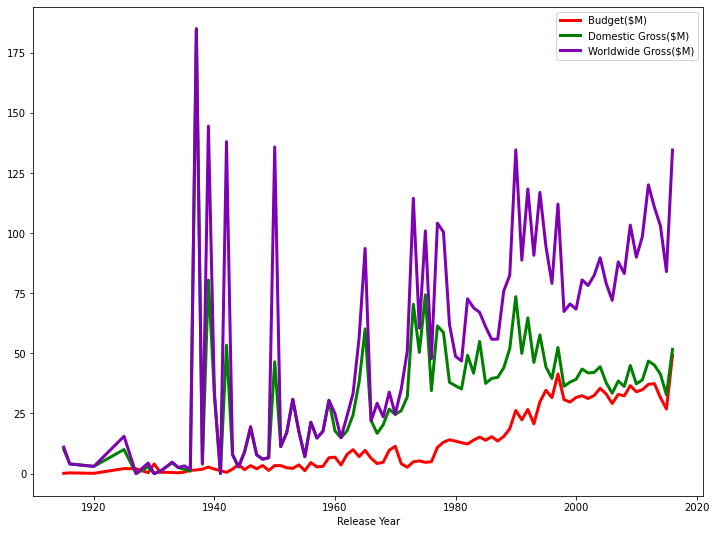

In [10]:
grossYear = mfin.groupby('Release Year').mean()
grossYear[var].plot(figsize=(12,9), lw=3, color=[(1,0,0), (0,0.5,0), (0.5,0,0.7)])

We used a few addtional keywords here. *lw* controls the thickness of the lines, where *color* specifies the color of each line in terms of the [*RGB color model*](https://en.wikipedia.org/wiki/RGB_color_model). 

The *plot* function also supports subplots argument which makes it easier to separate the plots. 

In [11]:
grossYear[var].plot(figsize=(12,27), subplots=True, layout=(3,1), lw=2, color=[(1,0,0), (0,1,0), (0,0,1)])

array([[<AxesSubplot:xlabel='Release Year'>],
       [<AxesSubplot:xlabel='Release Year'>],
       [<AxesSubplot:xlabel='Release Year'>]], dtype=object)

**Exercise:** Construct line plots for the three variables by Year and Month. 

<AxesSubplot:xlabel='Month'>

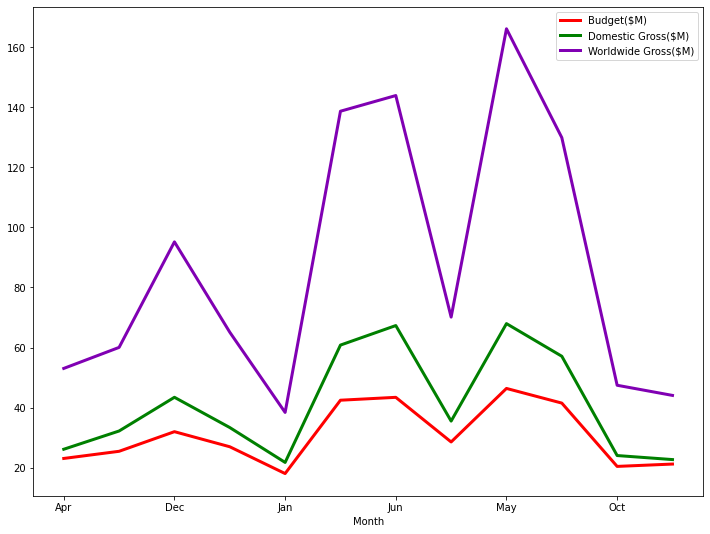

In [23]:
grossMonth = mfin.groupby('Month').mean()
grossMonth[var].plot(figsize=(12,9), lw=3, color=[(1,0,0), (0,0.5,0), (0.5,0,0.7)])

array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>], dtype=object)

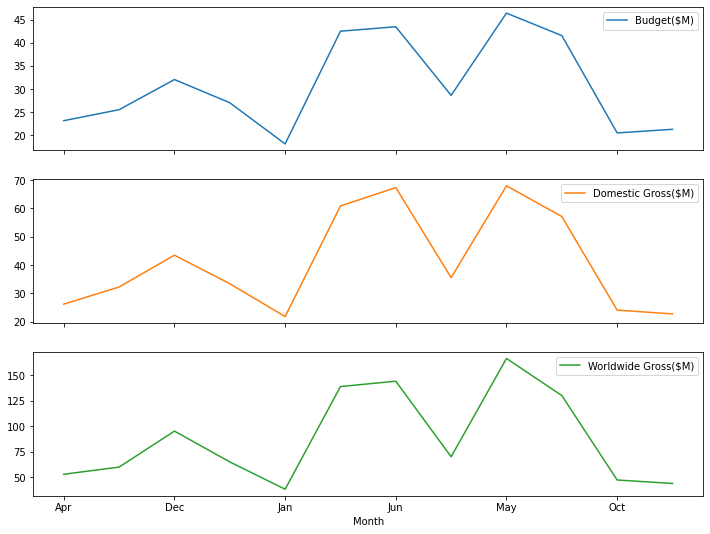

In [12]:
temp = mfin.groupby('Month').mean()
temp[var].plot(subplots=True)

## Scatter Plot

Scatter plot is a great way to explore potential relation between two variables. To construct a scatter plot between Domestic Gross and Worldwide Gross

<AxesSubplot:xlabel='Domestic Gross($M)', ylabel='Worldwide Gross($M)'>

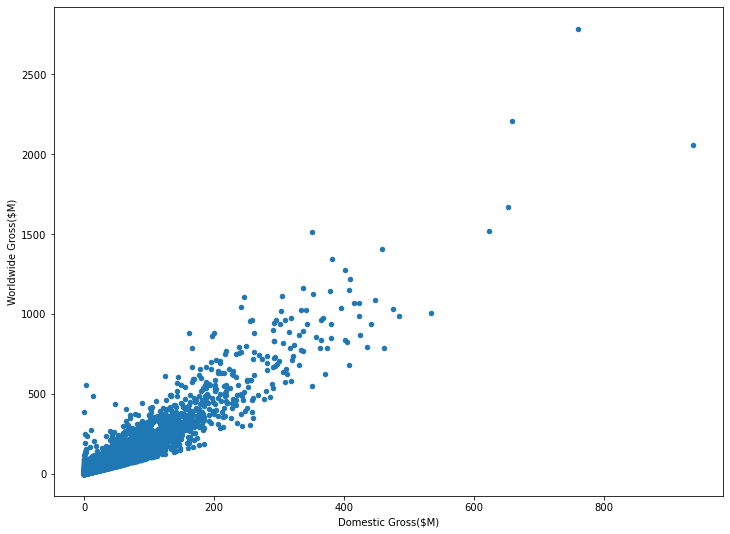

In [13]:
mfin.plot.scatter(x='Domestic Gross($M)', y='Worldwide Gross($M)')

**Exercise:** Construct a scatter plot between Budget and Domestic Gross as well as Budget and Worldwide Gross. Do you think bigger is the budget the higher is the gross? 

### Relplot

A popular extension to Scatterplot is *Relplot*, which allows grouping of variables in the plots as well as reflecting the values of a third variable by the size of the dot.  An example using [*relplot* function in Seaborn](https://seaborn.pydata.org/generated/seaborn.relplot.html) can be found below. 

In this case, we are still plotting the gross variables against each other but we are separating the observations based on their released Months using different colors and the size of each dot represents the size of the movie's budget. 

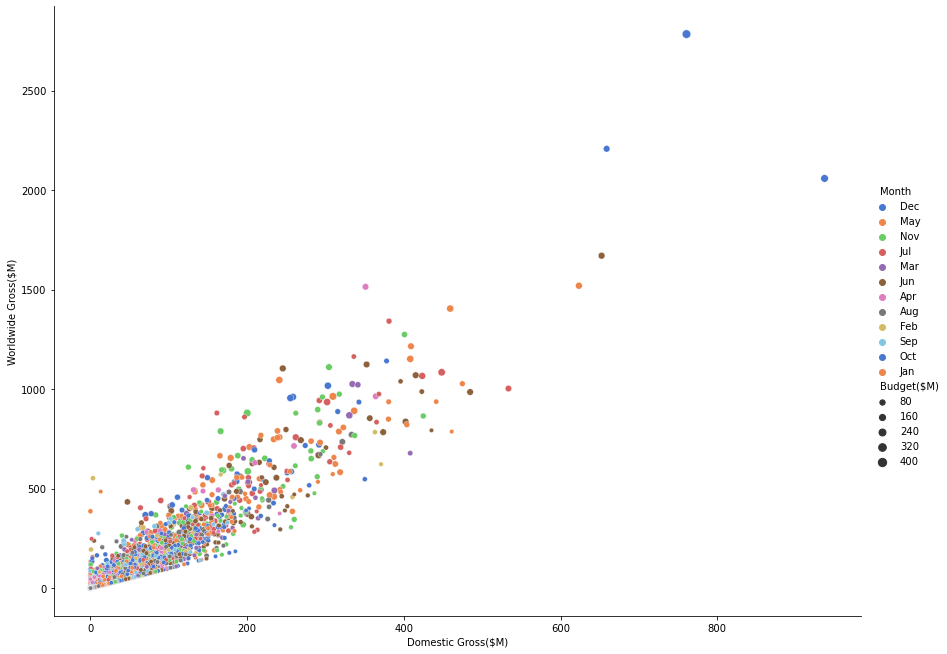

In [14]:
sb.relplot(x='Domestic Gross($M)', y='Worldwide Gross($M)', hue='Month', size='Budget($M)', data=mfin, height=9, aspect=4/3, palette='muted')

## Heatmap

When the summary statistics is itself a large 2-dimensional data, such as a *correlation matrix*, it is often difficulties to detect any patterns. A *heatmap* may be one way to visual such data. 

Another example is to consider the mean of the three variables, budget, Domestic Gross and Worldwide Gross for each year. The data we have in tabular form is stored in *grossYear*. 

In [15]:
grossYear

Day  Budget($M)  Domestic Gross($M)  Worldwide Gross($M)
Release Year                                                                
1915           8.000000    0.110000           10.000000            11.000000
1916          14.500000    0.292953            4.000000             4.000000
1920          17.000000    0.100000            3.000000             3.000000
1925          15.500000    2.072500           10.000000            15.500000
1927          12.000000    2.000000            0.000000             0.000000
...                 ...         ...                 ...                  ...
2012          16.960526   37.079584           46.782595           120.045120
2013          16.646552   37.419125           45.116518           110.717417
2014          17.016461   31.575751           41.317979           102.988348
2015          17.685185   26.853841           32.749798            83.975832
2016          16.035211   49.132606           51.640742           134.505668

[92 rows x 4 columns]

This does not tell us much. Perhaps we can construct a heatmap. 

<AxesSubplot:ylabel='Release Year'>

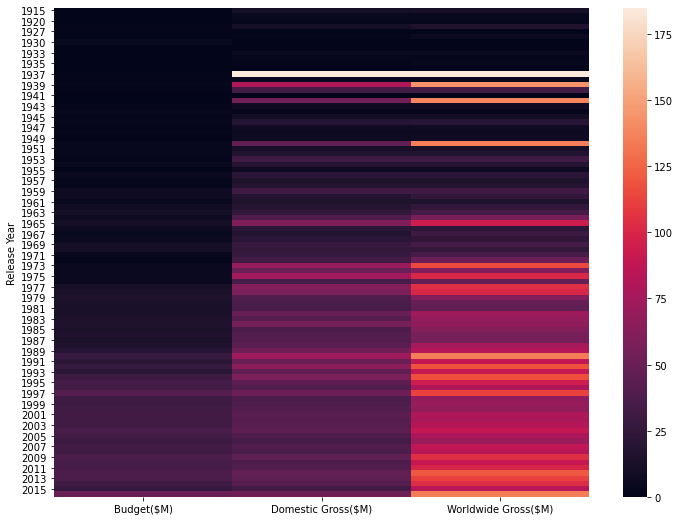

In [16]:
sb.heatmap(grossYear[var])

The values of all three variables increase over time. The interestingly there seems to be a dip in worldwide gross during late 70's and late 90's

For more information about different heatmap options see [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html). 

**Exercise:** Construct a heatmap for the correlation matrix between the three variables. **Hint:** Look up how to construct a correlation matrix from a pandas dataframe. 

<AxesSubplot:>

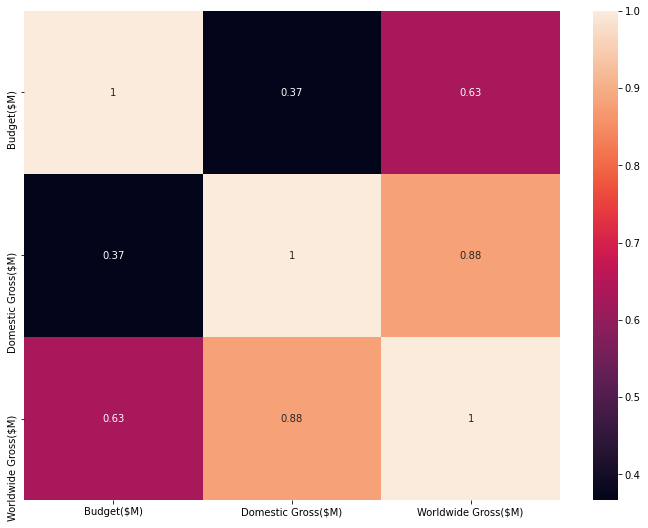

In [26]:
cor = grossYear[var].corr()
sb.heatmap(cor, annot=True)

## Saving the Plots

Great that we can create these plots and it is good that we have them in the notebook but how do we export them? Since both Seanborn and Pandas use matplotlib as the backend, we can utilise the [*savefig*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) function. 

Let say we wish to save the heatmap above.

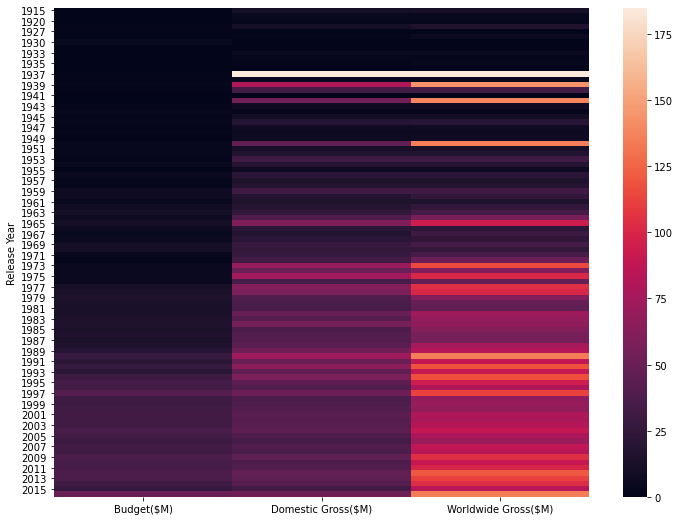

In [17]:
sb.heatmap(grossYear[var])
plt.savefig("heatmap.pdf")

The first line is to redraw the graph which output will be put to the *plt* object from matplotlib. Then we ask *plt* to save the output by specifying the filename (with path). The extension *pdf* indicates we wish the file to be a PDF file. We can also use PNG for graphical output. 

For more inforamtion on savefig see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). 